In [1]:
from module import learning, mining, util

Edge-IIoT Dataset 3 sub directories; Attack traffic, Normal traffic, and Selected dataset for ML and DL.

ML dataset has 157,797 rows and 63 columns, whereas DL dataset has 2,219,201 rows and 63 columns.

Raw data is stored both in .csv and .pcap formats. It requires to be integrated within a single .csv file (or dataframe) to be processed. Therefore, I needed to implement a integration function.

In [2]:
#SOURCE = "mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot"
#path = mining.get_dataset(SOURCE)
#mining.integration(path, "data/dataset.csv")

c:\Users\Batuhan\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (2,3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


------------------------- DETAILED SUMMARY -------------------------
Normal                   1615643
DDoS_UDP                  121568
DDoS_ICMP                 116436
SQL_injection              51203
Password                   50153
Vulnerability_scanner      50110
DDoS_TCP                   50062
DDoS_HTTP                  49911
Uploading                  37634
Backdoor                   24862
Port_Scanning              22564
XSS                        15915
Ransomware                 10925
MITM                        1214
Fingerprinting              1001
Name: Attack_type, dtype: int64
Number of rows : 2219201
Number of columns : 63
---------------------------------------------------------------------------


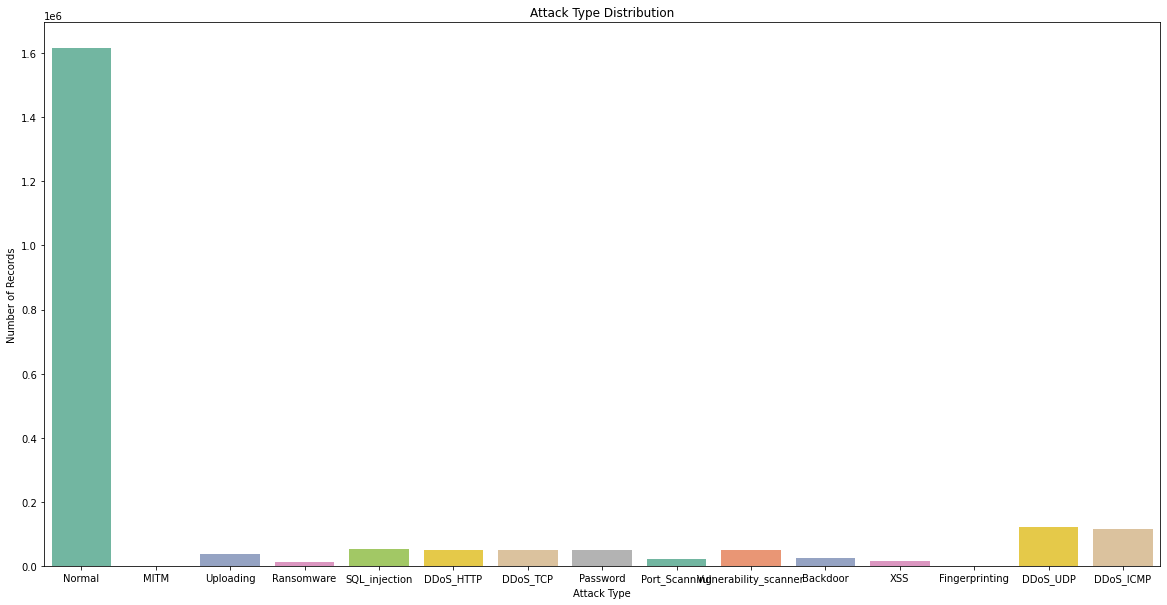

In [3]:
miner = mining.DataMiningPipeline("data/dataset.csv")
util.dataset_detailed_summary(miner.data, "Attack_type")
util.attack_type_distribution(miner.data, "Attack_type")

Some of the columns are unnecessary and might cause a bias for the model. Since, it is a case specific thing, I implemented a different function for it, called `drop_unnecessary_columns`.

Rest of the cleaning is implemented within the function `data_cleaning`. It drops duplicated data and fill empty fields with mode or mean, according to the data type.

In [4]:
miner.drop_unnecessary_columns(["ip.src_host", "ip.dst_host", "arp.src.proto_ipv4",
                                "arp.dst.proto_ipv4", "http.file_data",
                                "icmp.transmit_timestamp", "tcp.payload", "tcp.srcport",
                                "tcp.dstport", "udp.port"])
miner.data_cleaning()
util.dataset_detailed_summary(miner.data, "Attack_type")

------------------------- DETAILED SUMMARY -------------------------
Normal                   1615643
DDoS_UDP                  121567
DDoS_ICMP                 116436
SQL_injection              51203
Password                   50153
Vulnerability_scanner      50110
DDoS_TCP                   50062
DDoS_HTTP                  49911
Uploading                  37634
Backdoor                   24862
Port_Scanning              22564
XSS                        15915
Ransomware                 10925
Fingerprinting              1001
MITM                         359
Name: Attack_type, dtype: int64
Number of rows : 2218345
Number of columns : 53
---------------------------------------------------------------------------


Transformation phase involves encoding of categorical data and scaling of numerical data. Labels are excluded from this phase.

------------------------- DETAILED SUMMARY -------------------------
Normal                   1615643
DDoS_UDP                  121567
DDoS_ICMP                 116436
SQL_injection              51203
Password                   50153
Vulnerability_scanner      50110
DDoS_TCP                   50062
DDoS_HTTP                  49911
Uploading                  37634
Backdoor                   24862
Port_Scanning              22564
XSS                        15915
Ransomware                 10925
Fingerprinting              1001
MITM                         359
Name: Attack_type, dtype: int64
Number of rows : 2218345
Number of columns : 53
---------------------------------------------------------------------------


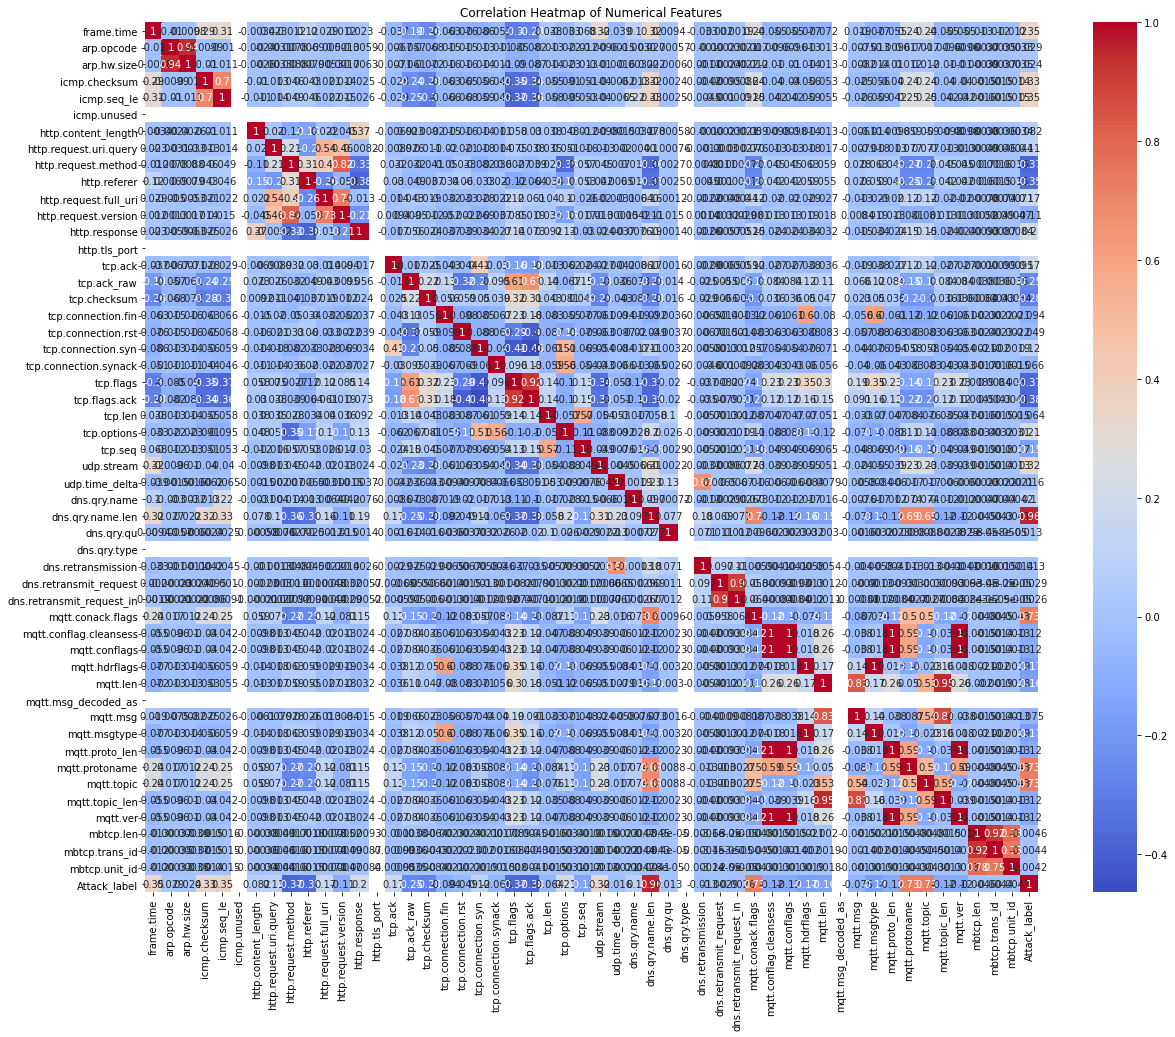

In [5]:
miner.data_transformation("Attack_type")
util.dataset_detailed_summary(miner.data, "Attack_type")
util.correlation_matrix(miner.data, "Attack_type")

PCA is performed for data dimensionality reduction. Since all data is in numerical format after transformation, `n_components` will be the number of features to continue.

------------------------- DETAILED SUMMARY -------------------------
Normal                   1615643
DDoS_UDP                  121567
DDoS_ICMP                 116436
SQL_injection              51203
Password                   50153
Vulnerability_scanner      50110
DDoS_TCP                   50062
DDoS_HTTP                  49911
Uploading                  37634
Backdoor                   24862
Port_Scanning              22564
XSS                        15915
Ransomware                 10925
Fingerprinting              1001
MITM                         359
Name: Attack_type, dtype: int64
Number of rows : 2218345
Number of columns : 11
---------------------------------------------------------------------------


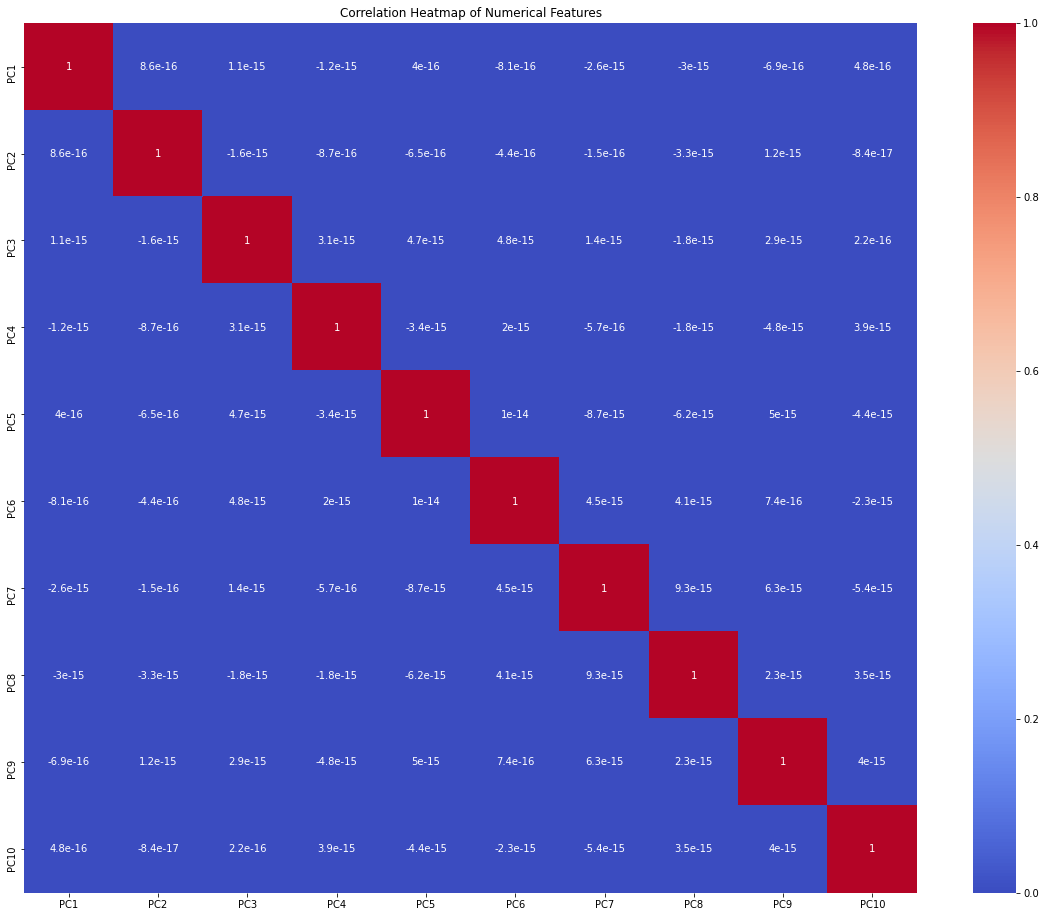

In [6]:
miner.data_reduction(n_components=10)
util.dataset_detailed_summary(miner.data, "Attack_type")
util.correlation_matrix(miner.data, "Attack_type")

In deep learning pipeline, data set is splitted into train, validation, and test parts. Labels are encoded. Then, a CNN model is built. `num_epochs` and `batch_size` can be arranged directly from the cell below, yet you need to visit the source to change `learning_rate` or any internal model parameter.

In [7]:
learner = learning.DeepLearningPipeline(miner.data, "Attack_type")
learner.build()
learner.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 10, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 32)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5, 64)             6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2, 128)            24704     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [8]:
learner.train(num_epochs=10, batch_size=256)

Epoch 1/10
5546/5546 [==============================] - 45s 8ms/step - loss: 0.2157 - accuracy: 0.9350 - recall: 0.9039 - precision: 0.9644 - f1_score: 0.9257 - val_loss: 0.0455 - val_accuracy: 0.9834 - val_recall: 0.9833 - val_precision: 0.9839 - val_f1_score: 0.9836
Epoch 2/10
5546/5546 [==============================] - 42s 8ms/step - loss: 0.0383 - accuracy: 0.9877 - recall: 0.9874 - precision: 0.9881 - f1_score: 0.9878 - val_loss: 0.0156 - val_accuracy: 0.9954 - val_recall: 0.9952 - val_precision: 0.9956 - val_f1_score: 0.9954
Epoch 3/10
5546/5546 [==============================] - 42s 8ms/step - loss: 0.0214 - accuracy: 0.9934 - recall: 0.9932 - precision: 0.9936 - f1_score: 0.9934 - val_loss: 0.0412 - val_accuracy: 0.9863 - val_recall: 0.9862 - val_precision: 0.9865 - val_f1_score: 0.9863
Epoch 4/10
5546/5546 [==============================] - 43s 8ms/step - loss: 0.0190 - accuracy: 0.9942 - recall: 0.9940 - precision: 0.9944 - f1_score: 0.9942 - val_loss: 0.0217 - val_accuracy:

In [9]:
y_true, y_predicted = learner.evaluate()

As results, Accuracy, Precision, Recall, F1 Score are given. Also classification report is printed.

In [10]:
util.print_score(y_true, y_predicted)

Accuracy (Sample-wise): 0.9969910000473325
Precision (Micro): 0.9969910000473325
Recall (Micro): 0.9969910000473325
F1 Score (Micro): 0.9969910000473325

Precision-Recall-F1 (Macro Average):
(0.9779328554449201, 0.9333528107531871, 0.9435451752645185, None)

Precision-Recall-F1 (Weighted Average):
(0.996964358346504, 0.9969910000473325, 0.9968867016648503, None)

Classification Report (Label-wise):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      4972
           1       0.99      1.00      1.00      9982
           2       1.00      1.00      1.00     23287
           3       0.98      1.00      0.99     10012
           4       1.00      1.00      1.00     24313
           5       0.89      0.25      0.39       200
           6       1.00      1.00      1.00        72
           7       1.00      1.00      1.00    323129
           8       1.00      0.98      0.99     10031
           9       0.96      0.96      0.96      4513
   

Also, a confusion matrix is shown. Don't focus on the `normal` class (center of the confusion matrix) that much, it might be misleading! 

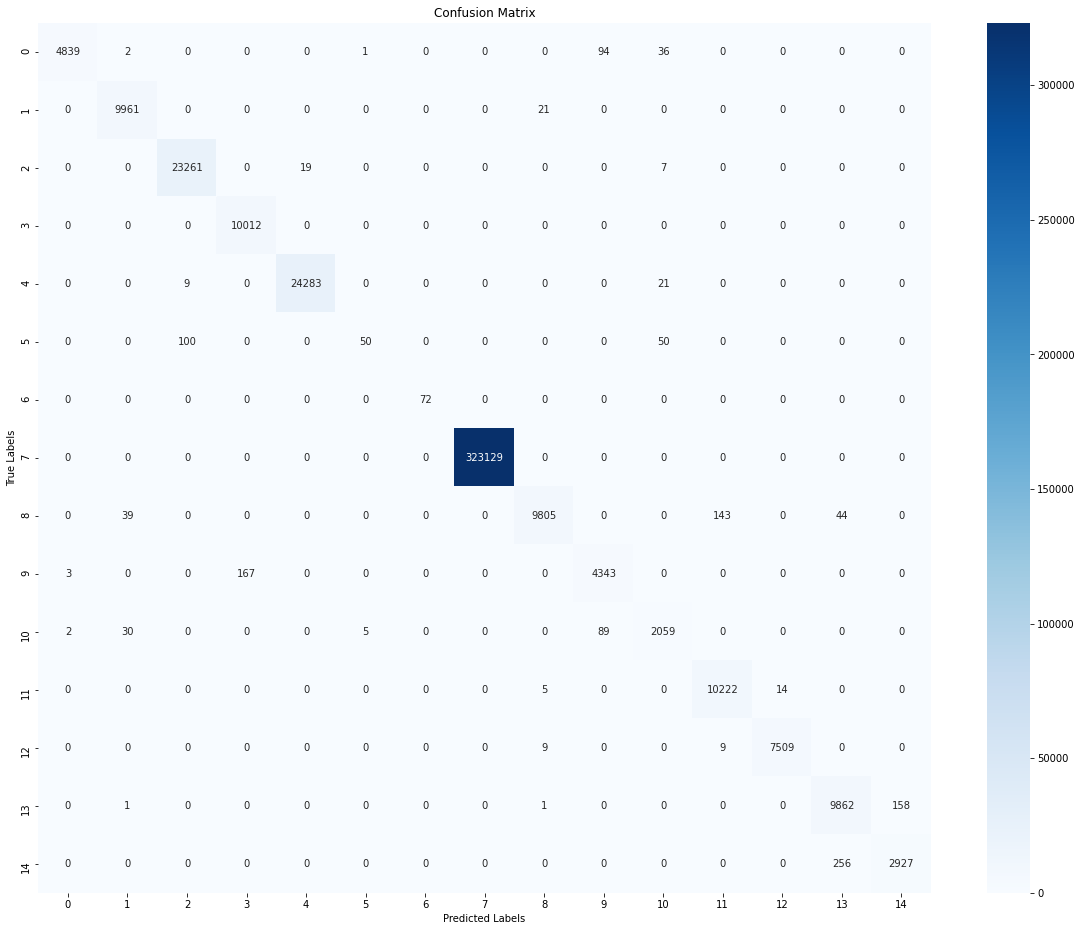

In [11]:
util.conf_matrix(y_true, y_predicted)